In [1]:
import os
import pandas as pd
import xlrd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [41]:
data=pd.read_csv('/content/drive/MyDrive/HistoricalQuotes.csv')
colstocheck = data.columns
data[colstocheck] = data[colstocheck].replace({'\$':''}, regex = True)
data[' Close/Last'] = pd.to_numeric(data[' Close/Last'])
data[' Open'] = pd.to_numeric(data[' Open'])
data[' High'] = pd.to_numeric(data[' High'])
data[' Low'] = pd.to_numeric(data[' Low'])
print(data.head())




         Date   Close/Last     Volume    Open    High     Low
0  02/28/2020       273.36  106721200  257.26  278.41  256.37
1  02/27/2020       273.52   80151380  281.10  286.00  272.96
2  02/26/2020       292.65   49678430  286.53  297.88  286.50
3  02/25/2020       288.08   57668360  300.95  302.53  286.13
4  02/24/2020       298.18   55548830  297.26  304.18  289.23


In [42]:
data.isnull().any()
del[data['Date']]


In [43]:
import scipy.stats as sts

col_values = [' Close/Last', ' Volume', ' Open', ' High', ' Low']
_, p = sts.normaltest(data[col_values])
normal = []
for pr, v in list(zip(p, col_values)):
  if pr < 1e-3:
    normal.append(v)

In [44]:
normal

[' Close/Last', ' Volume', ' Open', ' High', ' Low']

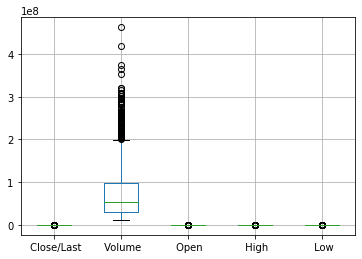

In [45]:
#scaler = StandardScaler()
data_=pd.DataFrame(data)
boxplot = data_.boxplot()

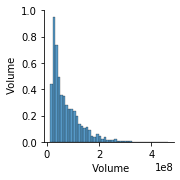

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/HistoricalQuotes.csv')
del[data['Date']]
sns.pairplot(data)

In [37]:
colstocheck = data.columns
#data[colstocheck] = data[colstocheck].replace({'\$':''}, regex = True)
#pd.to_numeric(data[colstocheck])
data.describe(include = 'all')



,Close/Last,Volume,Open,High,Low
count,2518.000000,2.518000e+03,2518.000000,2518.000000,2518.000000
mean,114.769522,7.258009e+07,114.728443,115.766415,113.690582
std,60.662405,5.663113e+07,60.546893,61.134456,60.085105
min,29.835700,1.136205e+07,29.392800,29.928600,28.464300
25%,66.822475,3.053026e+07,66.877150,67.475300,66.372950
50%,101.090000,5.295469e+07,101.115000,102.085000,100.350000
75%,154.630000,9.861006e+07,154.610000,155.735000,153.325000
max,327.200000,4.624423e+08,324.740000,327.850000,323.350000


In [46]:
def fix(df, columns):
  for x in columns:
    q75, q25 = np.percentile(df.loc[: ,x], [75, 25])
    intr_q = q75 - q25

    max_q = q75+1.5*intr_q
    min_q = q25-1.5*intr_q

    df.loc[df[x] < min_q,x] = np.nan
    df.loc[df[x] > max_q,x] = np.nan

  return df

test_df = fix(data, normal)

In [47]:
test_df = test_df.fillna(test_df.mean())

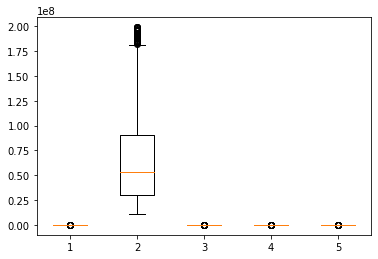

In [48]:
plt.boxplot(test_df[col_values].to_numpy())
plt.show()

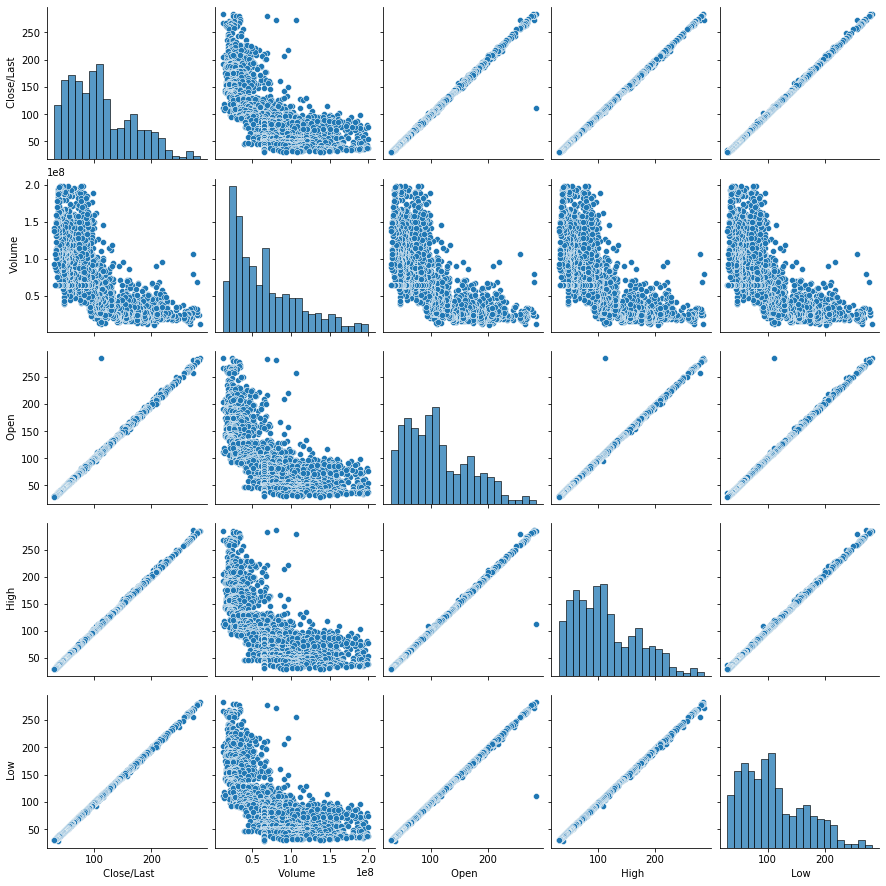

In [ ]:
sns.pairplot(test_df)

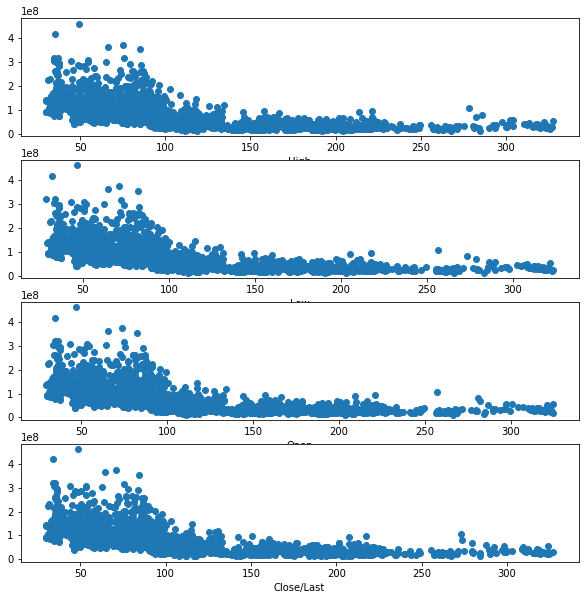

In [52]:
data=pd.read_csv('/content/drive/MyDrive/HistoricalQuotes.csv')
colstocheck = data.columns
data[colstocheck] = data[colstocheck].replace({'\$':''}, regex = True)
data.sort_values(by=" Volume")
data[' Close/Last'] = pd.to_numeric(data[' Close/Last'])
data[' Open'] = pd.to_numeric(data[' Open'])
data[' High'] = pd.to_numeric(data[' High'])
data[' Low'] = pd.to_numeric(data[' Low'])


fig, ax = plt.subplots(4, figsize=(10, 10))
ax[0].scatter(x = data[' High'], y = data[' Volume'])
ax[0].set_xlabel("High")

ax[1].scatter(x = data[' Low'], y = data[' Volume'])
ax[1].set_xlabel("Low")

ax[2].scatter(x = data[' Open'], y = data[' Volume'])
ax[2].set_xlabel("Open")

ax[3].scatter(x = data[' Close/Last'], y = data[' Volume'])
ax[3].set_xlabel("Close/Last")

plt.show()

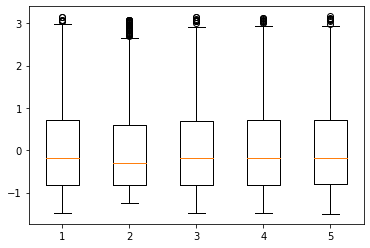

In [49]:
#second
scaler = StandardScaler()
plt.boxplot(scaler.fit_transform(test_df[col_values].to_numpy()))
plt.show()

In [50]:
pd.DataFrame(scaler.fit_transform(test_df[col_values])).describe()

,0,1,2,3,4
count,2.518000e+03,2.518000e+03,2.518000e+03,2.518000e+03,2.518000e+03
mean,-9.671903e-16,2.938255e-16,9.198361e-16,2.949719e-16,7.623414e-16
std,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00,1.000199e+00
min,-1.484846e+00,-1.254303e+00,-1.492929e+00,-1.489434e+00,-1.504259e+00
25%,-8.117859e-01,-8.104425e-01,-8.111554e-01,-8.113432e-01,-8.082626e-01
50%,-1.882088e-01,-2.911813e-01,-1.884296e-01,-1.862945e-01,-1.844495e-01
75%,7.066445e-01,5.881957e-01,7.005199e-01,7.096134e-01,7.055894e-01
max,3.145176e+00,3.089839e+00,3.152838e+00,3.135197e+00,3.167500e+00


In [31]:
import statistics

def f(df, columns):

  for x in columns:
    #j = df[x].std()
    q75, q25 = np.percentile(df.loc[: ,x], [75, 25])
    intr_q = q75 - q25

    max_q = q75+1.5*intr_q
    min_q = q25-1.5*intr_q

    df.loc[df[x] < min_q,x] = np.nan
    df.loc[df[x] > max_q,x] = np.nan

  return df
normal=[" Volume"]
test_df = f(data, normal)

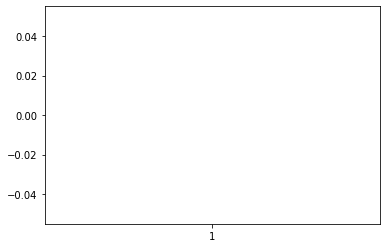

In [32]:
plt.boxplot(test_df[normal].to_numpy())
plt.show()